## CNN Application
- Build a mood classifier (Binary Clasiification)
- Hand Digit Recognition (Multiclass Classifier)

In [2]:
import numpy as np
import h5py
import math
import scipy
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt

Implement the `happyModel` function below to build the following model: `ZEROPAD2D -> CONV2D -> BATCHNORM -> RELU -> MAXPOOL -> FLATTEN -> DENSE`. Take help from [tf.keras.layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers) 

Also, plug in the following parameters for all the steps:

 - [ZeroPadding2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ZeroPadding2D): padding 3, input shape 64 x 64 x 3
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D): Use 32 7x7 filters, stride 1
 - [BatchNormalization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/BatchNormalization): for axis 3
 - [ReLU](https://www.tensorflow.org/api_docs/python/tf/keras/layers/ReLU)
 - [MaxPool2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPool2D): Using default parameters
 - [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) the previous output.
 - Fully-connected ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) layer: Apply a fully connected layer with 1 neuron and a sigmoid activation. 

In [9]:
def happyModel():
    model = tf.keras.Sequential([
        layers.ZeroPadding2D(padding=(3,3),input_shape=(64, 64, 3), data_format="channels_last"),
        layers.Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0'),
        layers.BatchNormalization(axis = 3, name = 'bn0'),
        layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0),
        layers.MaxPooling2D((2, 2), name='max_pool0'),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid', name='fc'),
    ])
    return model

In [11]:
happy_model = happyModel()

In [13]:
happy_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
happy_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ zero_padding2d_1 (ZeroPadding2D)     │ (None, 70, 70, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv0 (Conv2D)                       │ (None, 64, 64, 32)          │           4,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bn0 (BatchNormalization)             │ (None, 64, 64, 32)          │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pool0 (MaxPooling2D)             │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc (Dense)                           │ (None, 1)                   │          32,769 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,633 (147.00 KB)

 Trainable params: 37,569 (146.75 KB)

 Non-trainable params: 64 (256.00 B)

# Training and Testing

In [18]:
import h5py

def inspect_h5_file(file_path):
    with h5py.File(file_path, "r") as f:
        print(f"Keys in {file_path}:")
        for key in f.keys():
            print("-", key)

inspect_h5_file("train_happy.h5")
inspect_h5_file("test_happy.h5")

Keys in train_happy.h5:
- list_classes
- train_set_x
- train_set_y
Keys in test_happy.h5:
- list_classes
- test_set_x
- test_set_y


In [20]:
def load_dataset(train_path='train_happy.h5', test_path='test_happy.h5'):
    with h5py.File(train_path, 'r') as train_file:
        X_train = np.array(train_file['train_set_x'][:])     
        Y_train = np.array(train_file['train_set_y'][:])    
        classes = np.array(train_file['list_classes'][:])    
        
    with h5py.File(test_path, 'r') as test_file:
        X_test = np.array(test_file['test_set_x'][:])        
        Y_test = np.array(test_file['test_set_y'][:])       

    Y_train = Y_train.reshape((Y_train.shape[0], 1))
    Y_test = Y_test.reshape((Y_test.shape[0], 1))
    return X_train, Y_train, X_test, Y_test, classes


In [22]:
X_train, Y_train, X_test, Y_test ,classes= load_dataset()

# Normalization btwn 0 and 1
X_train = X_train / 255.
X_test = X_test / 255.

print(X_train.shape)  
print(Y_train.shape)

(600, 64, 64, 3)
(600, 1)


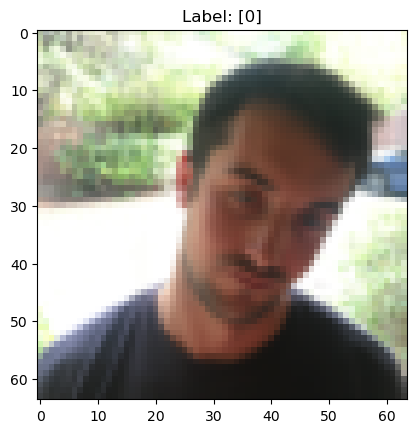

In [24]:
plt.imshow(X_train[0])
plt.title(f"Label: {classes[Y_train[0]]}")
plt.show()

In [26]:
history = happy_model.fit(X_train, Y_train, epochs=10, batch_size=16, validation_data=(X_test, Y_test))

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - accuracy: 0.6008 - loss: 2.5445 - val_accuracy: 0.6600 - val_loss: 0.6207
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.8380 - loss: 0.4239 - val_accuracy: 0.7133 - val_loss: 0.5738
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9130 - loss: 0.1857 - val_accuracy: 0.6933 - val_loss: 0.6290
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9147 - loss: 0.1874 - val_accuracy: 0.8400 - val_loss: 0.3336
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.9077 - loss: 0.2582 - val_accuracy: 0.9067 - val_loss: 0.2331
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.9386 - loss: 0.1547 - val_accuracy: 0.8600 - val_loss: 0.2707
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9789 - loss: 0.0717 - val_accuracy: 0.9200 - val_loss: 0.1866
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - accuracy: 0.9704 - loss: 0.0756 - val_accuracy: 0.9400 - v

In [28]:
happy_model.evaluate(X_test, Y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9082 - loss: 0.1691


[0.1681416779756546, 0.9133333563804626]

In [34]:
history = happy_model.history
print(history.history.keys())

dict_keys([])


# MultiClass Model

In [80]:
def convolutional_model(input_shape):
    """
    Implements the forward propagation for the model:
    CONV2D -> RELU -> MAXPOOL -> CONV2D -> RELU -> MAXPOOL -> FLATTEN -> DENSE
    """
    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tf.keras.layers.Conv2D(filters = 8 , kernel_size= (4,4), strides = (1,1), padding='same')(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPool2D(pool_size=(8,8), strides=(8, 8), padding='same')(A1)
    Z2 = tf.keras.layers.Conv2D(filters = 16 , kernel_size= (2,2), strides = (1,1), padding='same')(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPool2D(pool_size=(4,4), strides=(4, 4), padding='same')(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units=6, activation='softmax')(F)
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [82]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
conv_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 8)           │             392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_4 (ReLU)                       │ (None, 64, 64, 8)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 16)            │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_5 (ReLU)                       │ (None, 8, 8, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,310 (5.12 KB)

 Trainable params: 1,310 (5.12 KB)

 Non-trainable params: 0 (0.00 B)

# Testing 

In [85]:
X_train,Y_train,X_test,Y_test, classes = load_dataset(train_path = "train_signs.h5",test_path = "test_signs.h5")
X_train = X_train / 255.
X_test = X_test / 255.

print(X_train.shape)  
print(Y_train.shape)

(1080, 64, 64, 3)
(1080, 1)


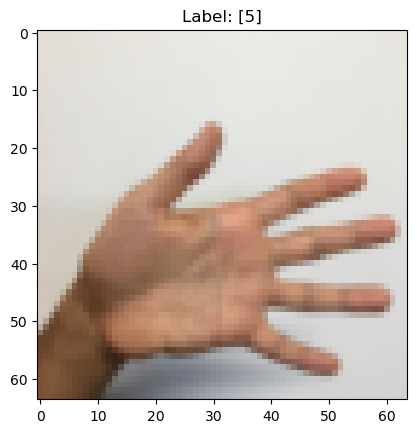

In [87]:
plt.imshow(X_train[0])
plt.title(f"Label: {classes[Y_train[0]]}")
plt.show()

In [89]:
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)]
    return Y

In [91]:
Y_train = convert_to_one_hot(Y_train, 6)
Y_test = convert_to_one_hot(Y_test, 6)
print(Y_train.shape)
print(Y_test.shape)

(1080, 6)
(120, 6)


In [95]:
History = conv_model.fit(X_train,Y_train,epochs=100, batch_size=16)

Epoch 1/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6058 - loss: 1.1350
Epoch 2/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6352 - loss: 1.0622
Epoch 3/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6700 - loss: 1.0166
Epoch 4/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6646 - loss: 0.9823
Epoch 5/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6726 - loss: 0.9501
Epoch 6/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6759 - loss: 0.8879
Epoch 7/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7055 - loss: 0.8591
Epoch 8/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7202 - loss: 0.8364
Epoch 9/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7158 - loss: 0.8191
Epoch 10/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7271 - loss: 0.8057
Epoch 11/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7343 - loss: 0.7668
Epoch 12/100
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step

In [97]:
test_loss, test_acc = conv_model.evaluate(X_test, Y_test)
print(f"Test accuracy: {test_acc:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8577 - loss: 0.3239 
Test accuracy: 0.85


In [107]:
History.history

{'accuracy': [0.6074073910713196,
  0.6305555701255798,
  0.6518518328666687,
  0.6740740537643433,
  0.6907407641410828,
  0.675000011920929,
  0.7037037014961243,
  0.730555534362793,
  0.7175925970077515,
  0.7490741014480591,
  0.7388888597488403,
  0.7509258985519409,
  0.7472222447395325,
  0.769444465637207,
  0.7648147940635681,
  0.7935185432434082,
  0.7842592597007751,
  0.7944444417953491,
  0.8009259104728699,
  0.8018518686294556,
  0.8083333373069763,
  0.8046296238899231,
  0.8203703761100769,
  0.8138889074325562,
  0.8175926208496094,
  0.8212962746620178,
  0.8166666626930237,
  0.8277778029441833,
  0.8379629850387573,
  0.8296296000480652,
  0.8435184955596924,
  0.8407407402992249,
  0.8379629850387573,
  0.8435184955596924,
  0.8490740656852722,
  0.8435184955596924,
  0.8537036776542664,
  0.8620370626449585,
  0.8685185313224792,
  0.8629629611968994,
  0.8629629611968994,
  0.8685185313224792,
  0.8601852059364319,
  0.8629629611968994,
  0.8666666746139526,
 

In [111]:
predictions = conv_model.predict(X_test)  
predicted_labels = predictions.argmax(axis=1) 
print(predicted_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0 0 0 5 1 0 3 2 5 2 5 2 3 1 1 3 5 5 0 4 5 4 2 5 3 5 4 2 1 2 3 1 0 2 1 1 0
 4 2 3 0 3 0 2 3 1 2 2 0 3 4 2 2 0 2 0 4 0 4 5 5 2 2 4 4 5 0 1 3 5 0 5 1 1
 3 4 3 5 1 5 2 0 2 3 2 4 2 1 4 5 5 0 0 5 5 5 3 4 5 2 2 2 0 1 5 3 0 2 3 4 1
 3 2 4 2 2 2 3 2 3]
